## ESMA 3016
## Lab6 : Calculo de cuartiles y Boxplot
## Edgar Acuna
Se usaran las librerias pandas, numpy, matplotlib y seaborn para calcular cuartiles y
trazar el boxplot de una variable e identificar los outliers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

In [3]:
#Calculo de un percentiles de un vector de numeros
x=[6,  8,  4,  12,  15,  17,  23,  18,  25,  11]
#Primer cuartil
np.percentile(x,25)

8.75

In [4]:
#la medina es:
np.percentile(x,50)

13.5

In [5]:
#tercer cuartil
np.percentile(x,75)

17.75

In [6]:
#Otro ejemplo
y=[10,  22,  17,  13,  28,  40,  29,  18,  23,  39,  44]
np.percentile(y,[25,50,75])

array([ 17.5,  23. ,  34. ])

In [12]:
#Este conjunto de datos esta disponible en kaggle.com
#Los datos fueron obtenidos en una encuestas a estudiantes 
#de matematicas y portugues en dos escuelas superiores GP y MS

df=pd.read_csv("http://academic.uprm.edu/eacuna/student-mat.csv",sep=",")

In [13]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [15]:
#Dimension de la base de datos
print(df.shape)

(395, 33)


In [16]:
#Calculando el primer cuartil de la variable ausencias a clases
q1=df.absences.quantile(.25)
q1

0.0

25 porciento de los estudiantes nunca faltaron a clases

In [17]:
#Calculando la mediana
df.absences.median()

4.0

In [18]:
df.absences.quantile(.50)

4.0

50 porciento de los estudiantes tuvieron hasta 4 ausencias

In [19]:
#Calculando el tercer cuartil
q3=df.absences.quantile(.75)
q3

8.0

75 porciento de los estudiantes tuvieron hasta 8 ausencias 

### Boxplot:
A continuacion  se van a ser calculos que  se usan para trazar el boxplot de la variable absences

In [20]:
#Calculando el rango intercuartilico
ric=q3-q1
ric

8.0

El rango intercuartilico puede ser usado como sustituto de la desviacion estandar

In [21]:
#calculando la frontera interior superior
fis=q3+1.5*ric
fis

20.0

In [22]:
#calculando la frontera interior inferior
fii=q1-1.5*ric
fii

-12.0

(array([ 287.,   72.,   25.,    5.,    1.,    2.,    0.,    2.,    0.,    1.]),
 array([  0. ,   7.5,  15. ,  22.5,  30. ,  37.5,  45. ,  52.5,  60. ,
         67.5,  75. ]),
 <a list of 10 Patch objects>)

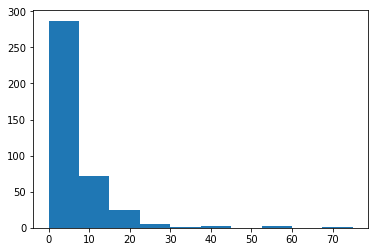

In [23]:
plt.hist(df['absences'])

{'boxes': [<matplotlib.lines.Line2D at 0xb6721d0>],
 'caps': [<matplotlib.lines.Line2D at 0xb672e48>,
 'fliers': [<matplotlib.lines.Line2D at 0xb684ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb684978>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb6722e8>,
  <matplotlib.lines.Line2D at 0xb6728d0>]}

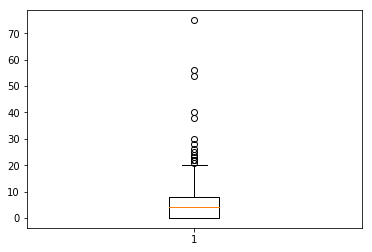

In [24]:
#Trazando el boxplot con matplotlib
plt.boxplot(df["absences"])

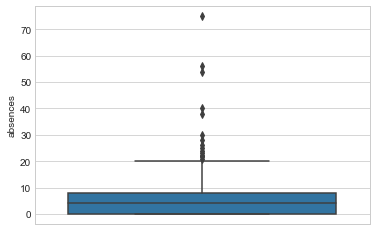

In [25]:
#Trazando el boxplot con seaborn
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=df["absences"],orient="v")

Interpretacion del Boxplot: La caja representa el comprtamiento en la parte central de las muestra, se ve  que hay simetria porque la mediana esta a igual distancia de q1 y q3, ademas hay poca variabilidad. Sin embargo la presencia de outliers en la parte superior  hace que en general
la muestra sea bastante variable y asimetroac hacia la derecha.

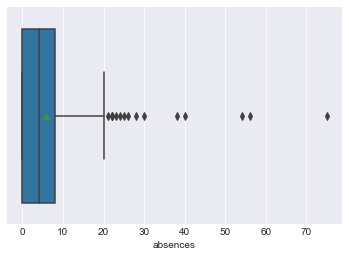

In [26]:
sns.set_style("darkgrid")
ax=sns.boxplot(x=df["absences"],showmeans=True)

In [27]:
#Identificando los indices de los estudiantes que son outliers
b=[]
for a in df['absences']:
    if (a<fii or a>fis):
        b=b+df[df['absences']==a].index.tolist()
print "Estos son los outliers:" ,b

Estos son los outliers: [40, 74, 103, 183, 198, 205, 216, 277, 313, 260, 276, 216, 277, 313, 280, 307, 216, 277, 313, 315, 320]


In [28]:
#mostrando los indices de los outliers y sus valores
df.iloc[b]['absences']

40     25
74     54
103    26
183    56
198    24
205    28
216    22
277    22
313    22
260    21
276    75
216    22
277    22
313    22
280    30
307    38
216    22
277    22
313    22
315    40
320    23
Name: absences, dtype: int64

In [29]:
#estas serian los estudiantes que son outliers
obs=[x+1 for x in b]
print obs

[41, 75, 104, 184, 199, 206, 217, 278, 314, 261, 277, 217, 278, 314, 281, 308, 217, 278, 314, 316, 321]
